In [1]:
import numpy as np
import pandas as pd
import sympy as sp

from astropy.table import QTable

import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline

from astropy import units as u
from astropy import constants as const

from astropy.units import imperial
imperial.enable()

from astropy.timeseries import LombScargle

from lightkurve import search_lightcurve

import exoplanet
from scipy.signal import find_peaks

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\rachel\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# read text file of goodies
stars_table = open('apjs492452t1_mrt.txt', 'r')

In [3]:
#shows table
obs = QTable.read('apjs492452t1_mrt.txt', format = 'ascii')
obs

KIC,Teff,log(g),Mass,PRot,e_PRot,Rper,LPH,w,DC,Flag
,K,dex(cm / s2),Msun,d,d,ppm,,,,
int32,float64,float64,float64,float64,float64,float64,float64,float64,int32,str3
892376,3813.0,4.47,0.4699,1.532,0.007,7306.69,0.823,0.4503,0,---
1026146,4261.0,4.57,0.6472,14.891,0.12,11742.56,1.405,0.7229,0,---
1026474,4122.0,4.56,0.5914,1.569,0.006,30471.8,1.204,0.6061,0,---
1162635,3760.0,4.77,0.4497,15.678,0.019,10207.47,0.978,0.5445,1,---
1164102,4045.0,4.62,0.5606,31.496,0.474,5139.74,0.568,0.3939,0,---
1292688,3774.0,4.74,0.455,42.659,2.131,6320.15,0.53,0.3172,1,---
1297303,4296.0,4.61,0.6613,27.333,0.193,6189.53,0.777,0.5124,0,---
1429921,4217.0,4.72,0.6295,23.131,0.11,15370.91,0.943,0.5839,0,---


In [4]:
# similar for loop from the ls vs mcquillan et al
num = np.array([0.0] * len(obs[0:999]))
for i,row in enumerate(obs['KIC'][0:999]):
    # rid of other errors
    try:
        # convert int to string
        kic_string = "KIC {0}".format(row)
        # same as usual
        klc1 = lk.search_lightcurve(kic_string, author="Kepler", cadence="long", quarter=4).download(download_dir = 'E:\lightcurves')
        
        # doing the thing where we want the time and flux
        x = klc1['time'].value
        y = klc1['flux'].value
        x_new = x[np.isfinite(x) & np.isfinite(y)]
        y_new = y[np.isfinite(x) & np.isfinite(y)]
        # get the result to graph our goodies
        # play around to get more precise measurements
        result = exoplanet.autocorr_estimator(x_new, y_new, yerr=None, min_period=0.1, max_period=None, oversample=2.0, smooth=2.0, max_peaks=10)
        lag, acf = result['autocorr']
        peaks, prominence = find_peaks(acf, prominence = 0.1)
        peaks, prominence
        
        # trying to do if one array value is more than the previous one, we take the biggest value
        # sort peaks by lag then get first two values
        p = np.argsort(lag[peaks])
        new_array = lag[peaks][p]
        
        # if statement
        if (prominence['prominences'][p][1] > prominence['prominences'][p][0]):
            high_peak = lag[peaks][p][1]
        else:
            high_peak = lag[peaks][p][0]
        print(high_peak)    
        num[i] = high_peak
        
    except:
        num[i]= -1

1.522242593124247
14.732040062830492
1.5733244607326924
15.59021217967529
15.345012945654162
27.0836336420507
10.778300643232797
37.17746856558733
16.376881913300167
12.698978609161713
35.92084355223051
11.524088163248962
20.994682012769772
23.048160174570512
33.96953830406346
13.342620749455818
12.188163804643409
21.35227075745206
17.81738676939858
15.702578788997926
14.844431221874402
14.85463035794237
10.563745015322638
15.763998239304783
30.976126548281172
14.394904639771994
26.04159483215699
12.085983772038162
36.97309533572479
1.8695975027549139
17.56195356819444
11.115419508656487
22.00625071676768
13.434571963171038
35.69609608970495
13.812567441229476
4.873220631718141
10.686348549301329
21.4442022073963
18.12387541647331
16.846820746690355
11.278888243425172
14.343800421469496
11.11541830538772
18.328178045157983
15.733354416079237
18.430488496625912


C:\Users\rachel\anaconda3\lib\site-packages\lightkurve\search.py:341: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(


21.668992783579597
13.46521749432577
15.98865606209074
19.89131106988134
25.336638207372744
9.552320824241178
29.26994062427184
17.510863896917726
20.708778473886923
1.7061392559589876
21.004921380634187
22.966460645169718
12.218807710291003
25.918992461865855
17.19417865919604
50.51998629225636
19.69716105723637
12.872740488455747
10.982689814136393
42.04053867289986
1.1646708734260756
24.09029671629105
35.83916875223804
13.67976021620052
10.165318342060345
16.009097423262574
36.43167885184084
9.031296617511543
2.9218892664139275
11.779504025962524
33.26458132502739
35.52239910159187
15.600430348018563
14.497054659925197
11.11542666493915
22.935776171343605
17.78671671896518
41.24387630495403
13.547030368245032
9.501303692049987
1.8491782287128444
27.247275551711937
34.51104676489922
10.870259751187405
18.859483845626528
15.51871176853092
13.618460261623113
15.620870162671054
23.027754042072047
11.554741810530686
15.05896106542059
32.54942015429697
17.602824094286916
11.96338080983332

C:\Users\rachel\anaconda3\lib\site-packages\lightkurve\search.py:341: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(


26.511708883645042
30.353093687084765
13.271176482627197
14.967107684697112
28.95342621392774
14.660603403917776
13.373289231891249
31.292867593238043
12.280108105733234
24.00849183777609
34.75612228540558
34.82762205807012
8.152666339716234
26.317373513651546
25.66350349941058
17.327134533203207
17.122794580485788
11.810230728340684
26.000879013936355
19.339748104404862
14.394982307592727
18.828858874814614
11.146107952652528
21.852885813616012
30.598122690589662
17.623291797917773
10.482024363875098
15.171338951604412
14.997659042142914
15.774098584166495
19.360041258569254
15.886465695821244
22.22061428337838
22.905336221265316
17.347552550541877
17.613177653533057
31.54841466009384
13.403989571961574
18.287453930424817
13.220088327077974
8.316188068951305
14.159995578484086
4.719996670617547
13.291561534639186
16.560813263651653
31.313317364310933
16.039767182483047
11.45259529075338
9.685156410021591
16.550583078569616
7.580575835927448
35.73696616282541
37.74959088224932
15.53912

In [5]:
table = QTable([obs['KIC'][0:999]], names = (['KIC ID']))
table.add_column(num, 1, 'High Peaks')
table

KIC ID,High Peaks
int32,float64
892376,1.522242593124247
1026146,14.732040062830492
1026474,1.5733244607326924
1162635,15.59021217967529
1164102,15.345012945654162
1292688,-1.0
1297303,27.0836336420507
1429921,10.778300643232797
1430349,37.17746856558733


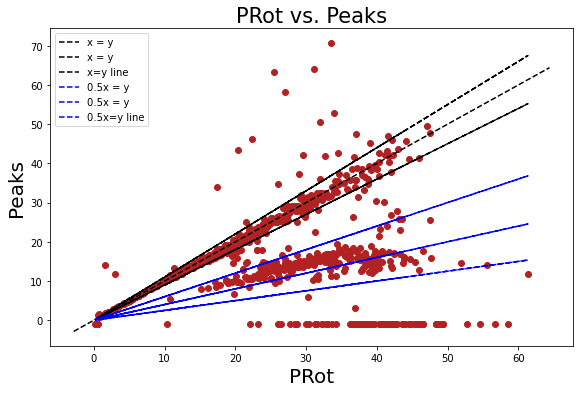

In [11]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5)
fig.tight_layout()

# plot our goodies
plt.scatter(obs[0:999]['PRot'], table['High Peaks'],
          facecolor = 'Firebrick')
plt.xlabel('PRot', fontsize = 20)
plt.ylabel('Peaks', fontsize = 20)
plt.title('PRot vs. Peaks', fontsize = 21)

# x = y cone
control_x = obs[0:999]['PRot']
control_y_upper = 1.1 * control_x.value
control_y_lower = 0.9 * control_x.value
plt.plot(control_x, control_y_upper,
        linestyle = '--',
        color = 'black',
        label = 'x = y')
plt.plot(control_x, control_y_lower,
        linestyle = '--',
        color = 'black',
        label = 'x = y')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints,
        '--',
        color = 'k',
        label = 'x=y line')

# 0.5x = y cone
xpoints = np.array(plt.xlim())
xpoints = obs[0:999]['PRot']
ypoints = 0.5 * xpoints
ypoints_upper = 0.6 * xpoints.value
ypoints_lower = 0.4 * xpoints.value
plt.plot(xpoints, ypoints_upper,
        '--',
       color = 'blue',
        label = '0.5x = y')
plt.plot(xpoints, ypoints_lower,
        '--',
        color = 'blue',
        label = '0.5x = y')
plt.plot(xpoints, 0.5*ypoints,
        '--',
        color = 'blue',
        label = '0.5x=y line')

plt.legend(loc = 'upper left')

In [7]:
# for black cones or the x = y cones
just_an_array1 = (table['High Peaks'] < control_y_upper) & (table['High Peaks'] > control_y_lower)
just_an_array1

array([ True,  True,  True,  True, False, False,  True, False,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,

In [8]:
# sum of points inside the black cones
np.sum(just_an_array1)

607

In [9]:
# for blue cone
just_an_array2 = (table['High Peaks'] < ypoints_upper) & (table['High Peaks'] > ypoints_lower)
just_an_array2

array([False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [10]:
# for blue cone
np.sum(just_an_array2)

180